<a href="https://colab.research.google.com/github/solcanalla/fiumark/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo: Naive Bayes #



##Inicialización##

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [2]:
!git clone https://github.com/solcanalla/fiumark.git
%cd fiumark
!git pull origin main
import preprocessing as pp

fatal: destination path 'fiumark' already exists and is not an empty directory.
/content/fiumark
From https://github.com/solcanalla/fiumark
 * branch            main       -> FETCH_HEAD
Already up to date.


##Modelo 1###

###Pre procesamiento###

In [3]:
pd.options.display.max_columns = None
df = pp.get_dataset()
df1 = pp.common_preprocessing(df)
X_train1, X_test1, y_train1, y_test1 = pp.get_train_test_data(df1)

###Entrenamiento###

In [4]:
from sklearn.model_selection import GridSearchCV

params = {
    'alpha': np.arange(0.0001,1,0.001)
}

clf = MultinomialNB()

gscv1 = GridSearchCV(
    clf, params, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train1, y_train1)

In [5]:
print(f"Best score: {gscv1.best_score_}")
print(f"Best params {gscv1.best_params_}")

Best score: 0.7670074889132869
Best params {'alpha': 0.0001}


##Modelo 2##

###Pre procesamiento###

In [6]:
pd.options.display.max_columns = None
df = pp.get_dataset()
df2 = pp.min_features_preprocessing(df)
X_train2, X_test2, y_train2, y_test2 = pp.get_train_test_data(df2)

###Entrenamiento###

In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    'alpha': np.arange(0.0001,1,0.001)
}

clf = MultinomialNB()

gscv2 = GridSearchCV(
    clf, params, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train2, y_train2)

In [8]:
print(f"Best score: {gscv2.best_score_}")
print(f"Best params {gscv2.best_params_}")

Best score: 0.7349450642598812
Best params {'alpha': 0.0001}


##Evaluación del modelo##

In [9]:
y_pred = gscv1.predict(X_test1)

###Precisión recall y F1-score##

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75        95
           1       0.65      0.42      0.51        66

    accuracy                           0.67       161
   macro avg       0.66      0.63      0.63       161
weighted avg       0.67      0.67      0.65       161



###Accuracy###

In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test1, y_pred)
accuracy

0.6708074534161491

###Auc-Roc###

In [12]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test1, y_pred)
auc_roc

0.6331738437001594

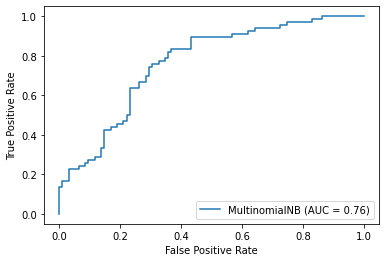

In [14]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gscv1.best_estimator_, X_test1, y_test1)  
plt.show()  

###Matriz de confusión###

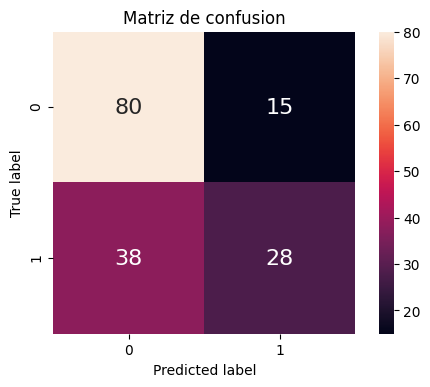

In [15]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    names = sorted(set(y_true))
    cm = confusion_matrix(y_true, y_pred, names)
    df_cm = pd.DataFrame(cm, names, names)

    plt.figure(dpi=100)
    plt.title("Matriz de confusion")
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', square=True)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


plot_confusion_matrix(y_test1, y_pred)

##Predicción##

In [17]:
X_holdout = pd.read_csv('https://drive.google.com/uc?export=download&id=1I980-_K9iOucJO26SG5_M8RELOQ5VB6A')
X_holdout = pp.common_preprocessing(X_holdout)
df2 = pd.DataFrame(gscv1.predict(X_holdout),columns=['volveria'])
df3 = pd.concat([X_holdout.id_usuario,df2],axis=1)
df3.to_csv('naivebayes.csv')
df3

,id_usuario,volveria
0,650,0
1,234,1
2,31,1
3,552,0
4,411,0
...,...,...
85,354,0
86,82,0
87,172,1
88,8,1
